El objetivo del siguiente ejercicio es predecir el tipo de vino a partir de características tales como su nivel de alcohol, de magnesio, contenido de fenoles, de flavonoides, etc.

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [3]:
from sklearn.datasets import load_wine
wine = load_wine()

In [4]:
rcParams["figure.figsize"] = (12, 6)

# Convertimos el dataset en dataframe
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

# Creamos una columna para el target
df["vino"] = wine.target

In [5]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,vino
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
df.shape

(178, 14)

In [7]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,vino
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [8]:
# Duplicated variables?
df.duplicated().sum()

0

In [9]:
# Change column names
df.rename(columns={"od280/od315_of_diluted_wines": "Proteins_concentration"}, inplace=True)

In [10]:
# Valores que puede tomar el target
df.vino.value_counts()

,count
vino,
1,71
0,59
2,48


In [11]:
# Proporción de los valores
wine_proportion = df.vino.value_counts("normalize = True")
(wine_proportion * 100).map("{:.2f}%".format)

,proportion
vino,
1,39.89%
0,33.15%
2,26.97%


(-1.0999991690077522,
 1.0999999604289405,
 -1.0999992071510019,
 1.0999921362797274)

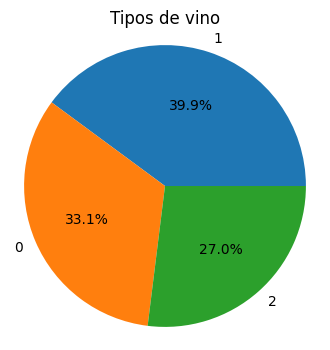

In [32]:
# Proporciones graficadas
plt.figure(figsize=(4,4))
plt.pie(wine_proportion, labels=wine_proportion.index, autopct='%1.1f%%')
plt.title('Tipos de vino')
plt.axis('equal')

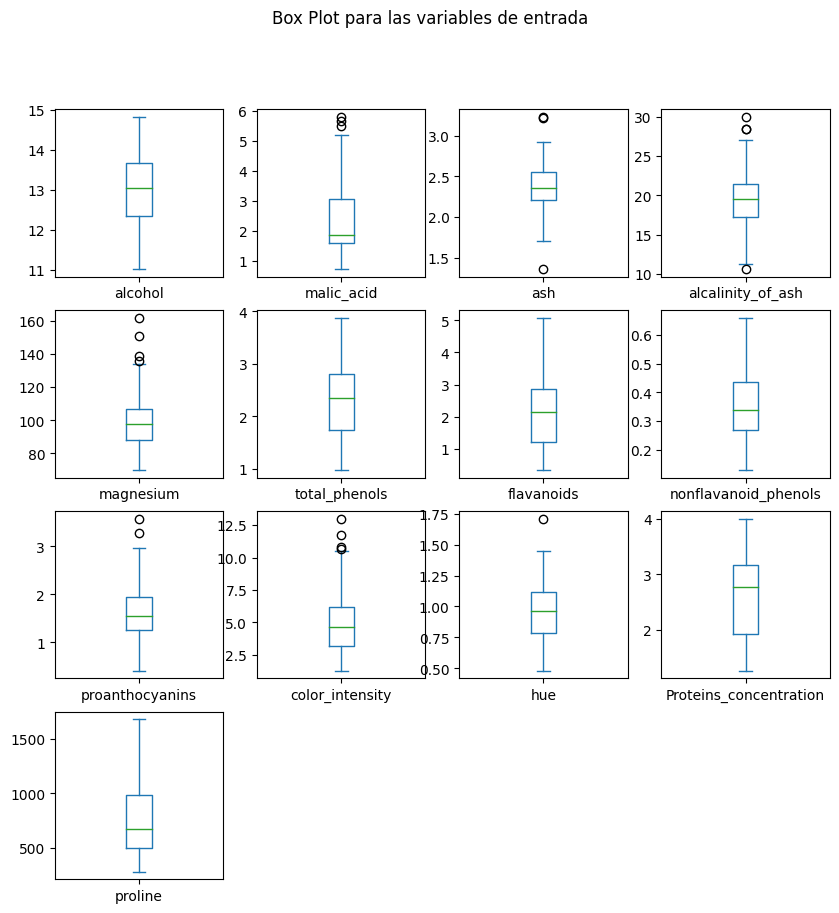

In [13]:
# Box plot de las variables explicativas
df.drop('vino', axis=1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(10,10), title='Box Plot para las variables de entrada')
plt.show()

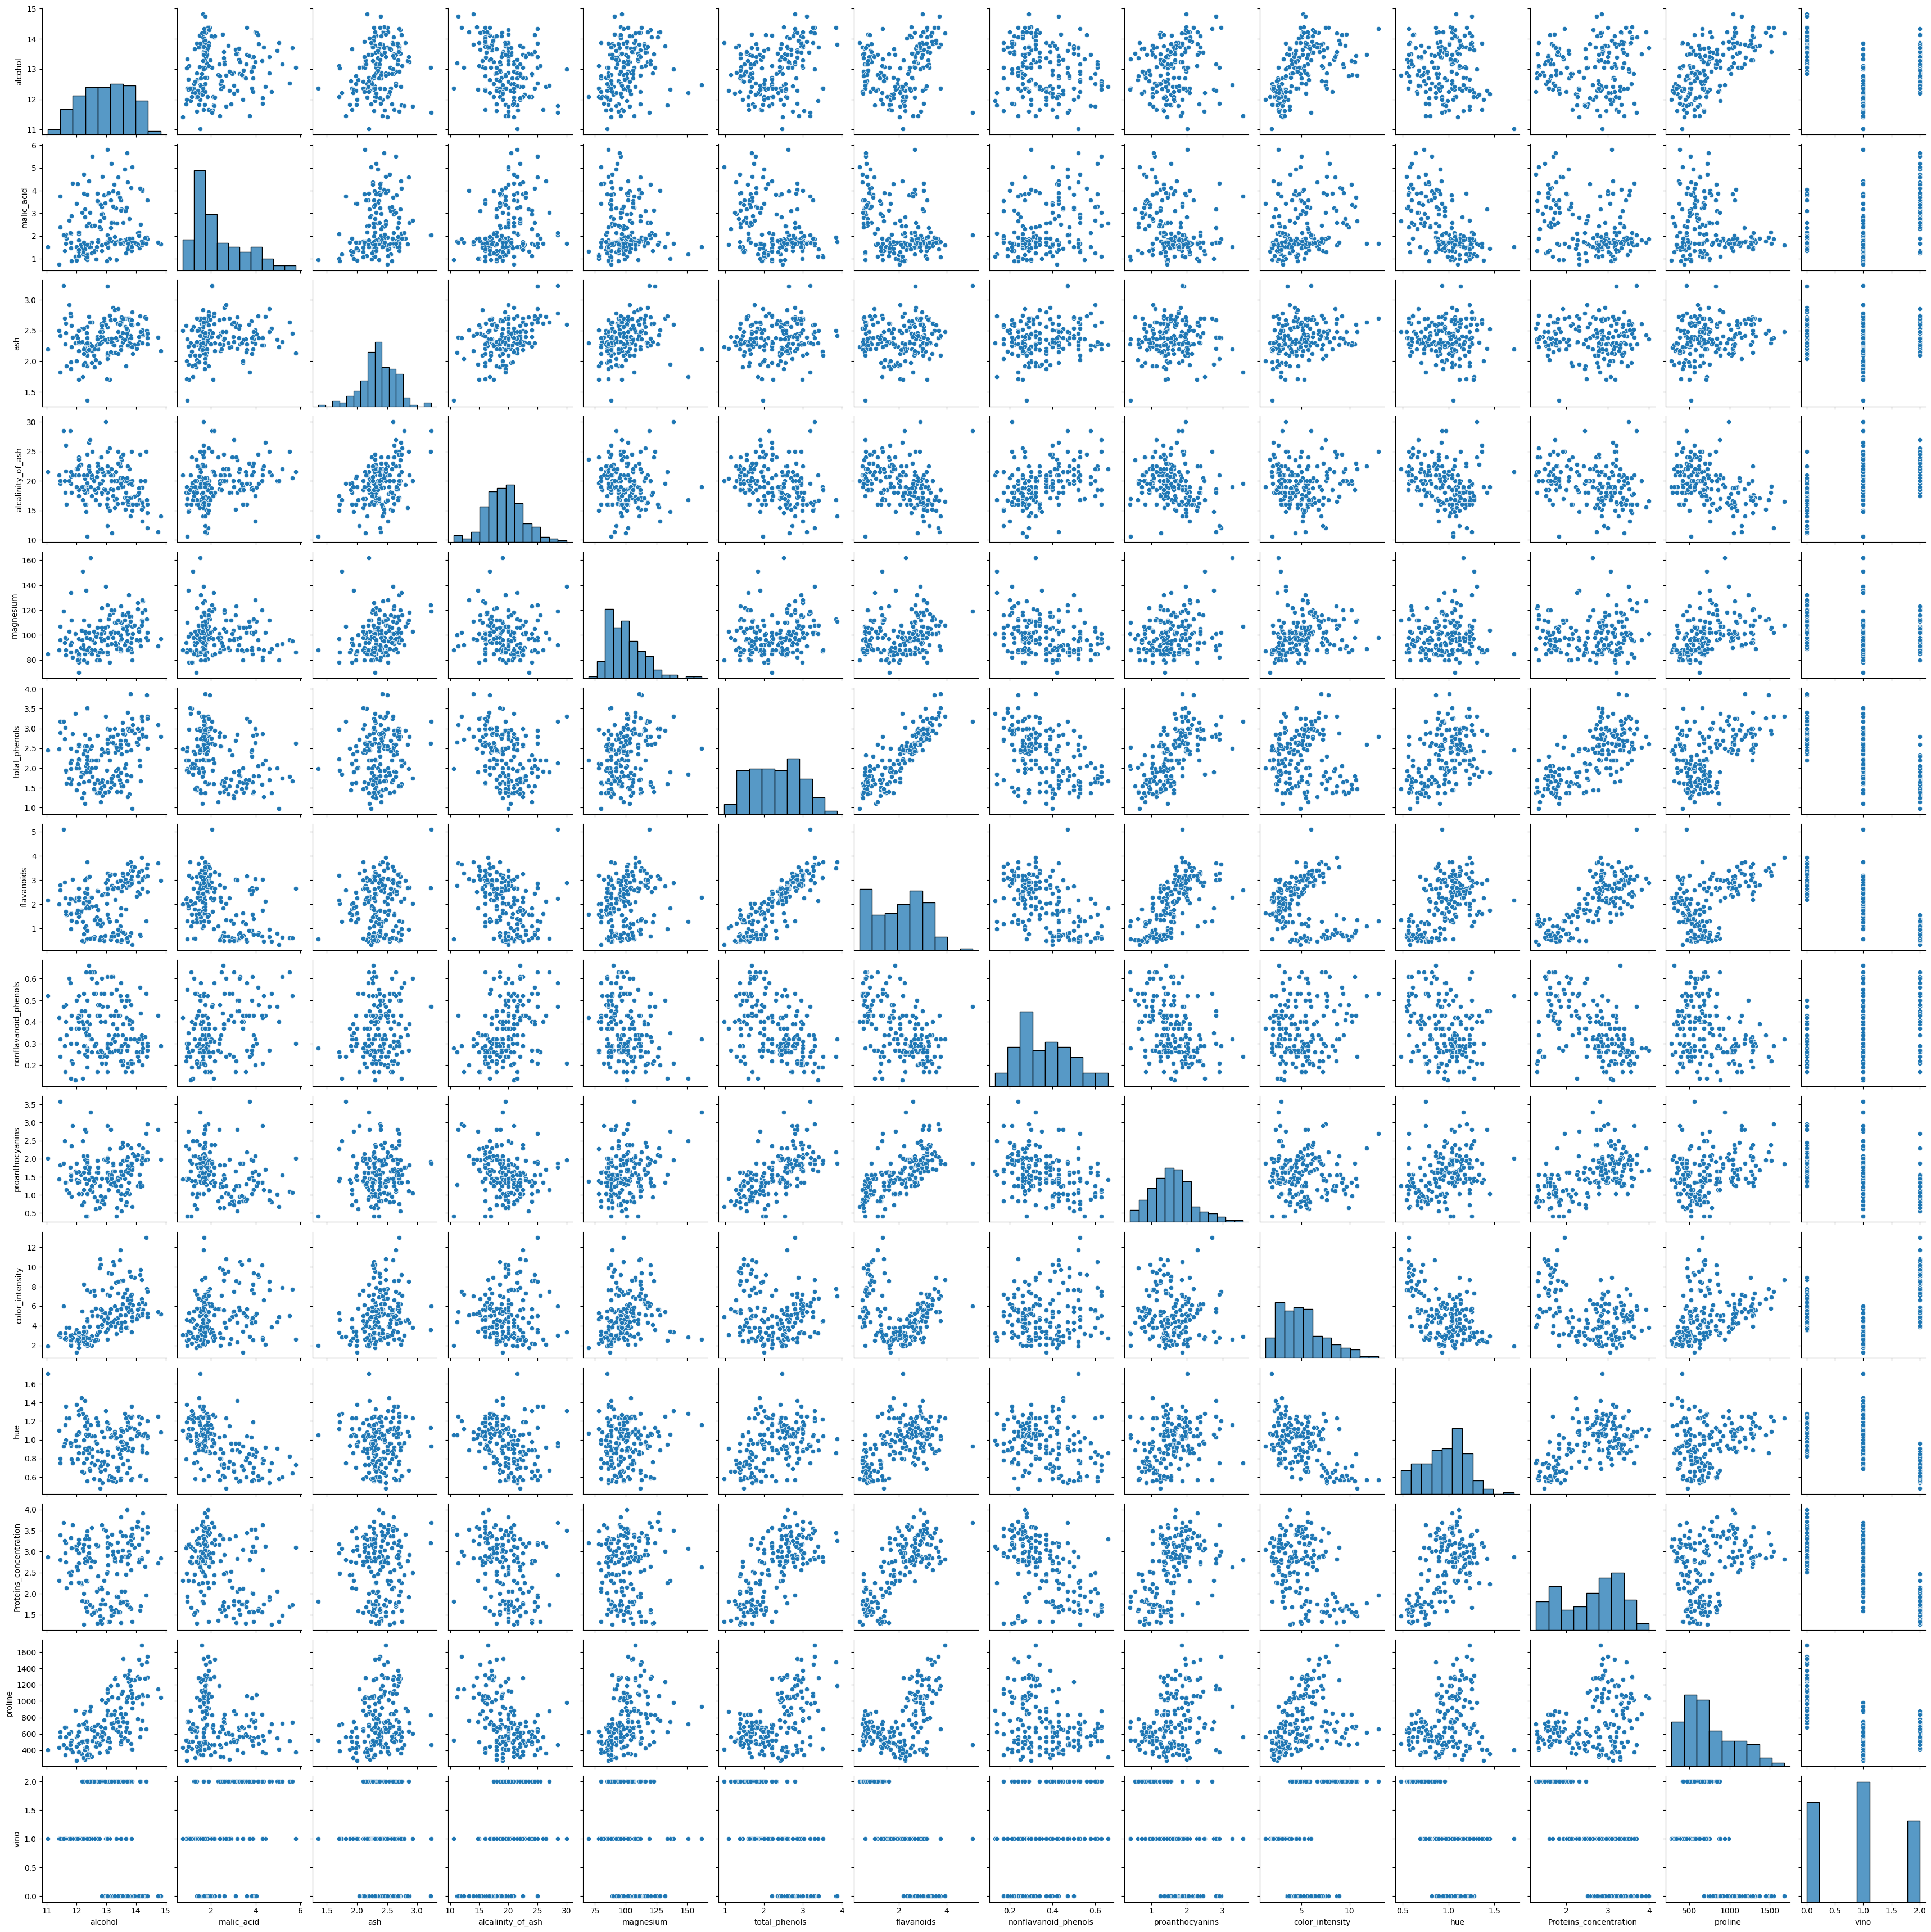

In [16]:
# Relación entre variables
sns.pairplot(df)

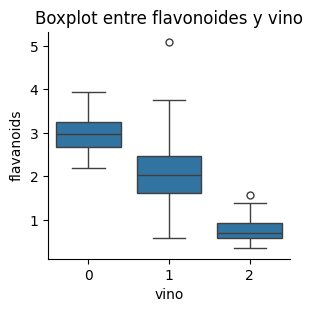

In [28]:
# Relación entre flavonoides y tipo de vino
sns.catplot(x="vino",y="flavanoids",data=df,kind="box",aspect=1,height=3)
plt.title("Boxplot entre flavonoides y vino")
plt.show()

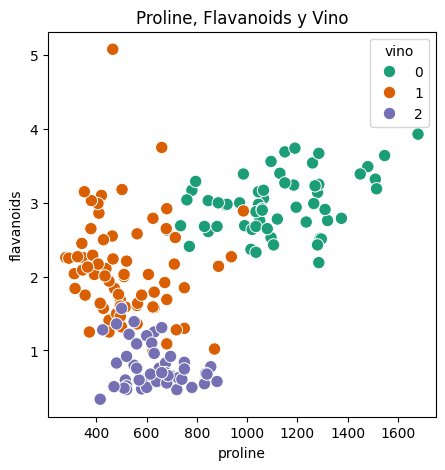

In [36]:
# Relación entre proline, flavanoids y vino
plt.figure(figsize=(5,5))
sns.scatterplot(x="proline",y="flavanoids",hue="vino",data=df,palette="Dark2",s=80)
plt.title("Proline, Flavanoids y Vino")
plt.show()

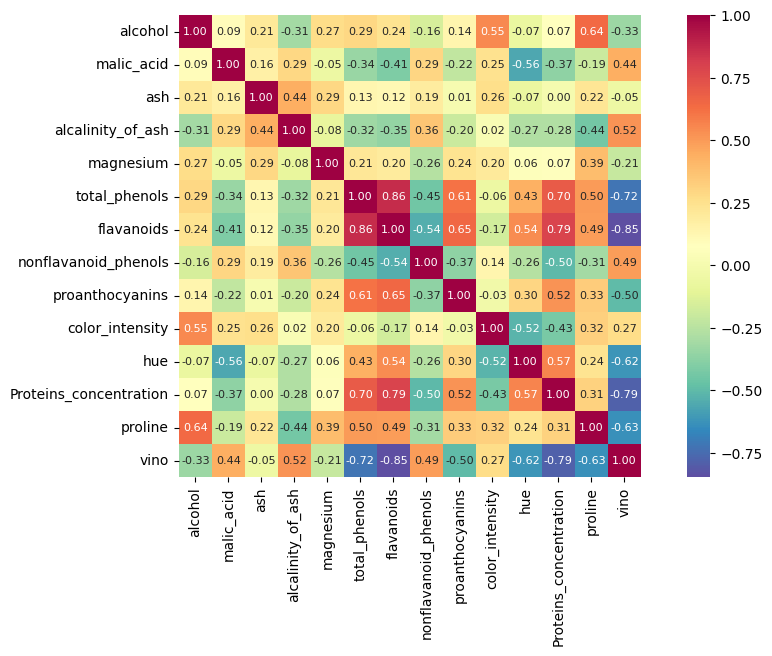

In [38]:
# Mapa de calor de correlaciones
hm = sns.heatmap(
    df.corr(),
    cbar=True,
    annot=True,
    square=True,
    fmt=".2f",
    annot_kws={"size": 8},
    yticklabels=df.columns,
    xticklabels=df.columns,
    cmap="Spectral_r"
)
plt.show()

# **Modelado**

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
# Asignar valores a las variables X y Y:
X = df.iloc[:,:-1].values
y = df["vino"]

# Separar el conjunto de datos en entrenamiento y evaluación del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Usando el algoritmo de los k vecinos más próximos
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [42]:
# Imprimiendo resultados:
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[10  0  0]
 [ 2 13  0]
 [ 0  6  5]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       0.68      0.87      0.76        15
           2       1.00      0.45      0.62        11

    accuracy                           0.78        36
   macro avg       0.84      0.77      0.77        36
weighted avg       0.82      0.78      0.76        36

